# WORK on brca_tcga_gdc "Breast Invasive Carcinoma (Invasive Breast Cancer)"

In [2]:
import pandas as pd

# Define file paths
patient_data_path = "data_clinical_patient.txt"  # Replace with the actual path
sample_data_path = "data_clinical_sample.txt"    # Replace with the actual path

# Function to read and display columns
def get_columns(file_path):
    try:
        # Read the file into a DataFrame
        # Skip rows with metadata headers (adjust skiprows as needed based on file structure)
        df = pd.read_csv(file_path, sep="\t", comment="#", low_memory=False)
        # Return column names
        return df.columns.tolist()
    except Exception as e:
        return f"Error reading file: {e}"

# Get columns for both files
patient_columns = get_columns(patient_data_path)
sample_columns = get_columns(sample_data_path)

# Print the results
print("Columns in data_clinical_patient.txt:")
print(patient_columns)

print("\nColumns in data_clinical_sample.txt:")
print(sample_columns)

Columns in data_clinical_patient.txt:
['PATIENT_ID', 'OTHER_PATIENT_ID', 'PRIMARY_SITE_PATIENT', 'DISEASE_TYPE', 'PROJECT_NAME', 'PROJECT_ID', 'SEX', 'RACE', 'ETHNICITY', 'VITAL_STATUS', 'YEAR_OF_DEATH', 'PRIMARY_DIAGNOSIS', 'YEAR_OF_DIAGNOSIS', 'PATH_M_STAGE', 'BIOPSY_SITE', 'AJCC_STAGING_EDITION', 'ICD_10', 'AGE', 'PATH_STAGE', 'MORPHOLOGY', 'PATH_T_STAGE', 'PRIOR_TREATMENT', 'PATH_N_STAGE', 'PRIOR_MALIGNANCY', 'PROJECT_STATE', 'OS_STATUS', 'OS_MONTHS', 'DFS_STATUS', 'DFS_MONTHS']

Columns in data_clinical_sample.txt:
['PATIENT_ID', 'SAMPLE_ID', 'ONCOTREE_CODE', 'CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'OTHER_SAMPLE_ID', 'SAMPLE_TYPE', 'IS_FFPE']


In [3]:
import pandas as pd

# Load the files
patient_df = pd.read_csv("data_clinical_patient.txt", sep="\t", comment="#")
sample_df = pd.read_csv("data_clinical_sample.txt", sep="\t", comment="#")

# Merge the files
merged_df = pd.merge(patient_df, sample_df, on="PATIENT_ID", how="inner")

In [4]:
# Define relevant columns
relevant_columns = [
    "PATIENT_ID", "SAMPLE_ID", "SEX", "RACE", "ETHNICITY", "AGE", 
    "VITAL_STATUS", "OS_STATUS", "OS_MONTHS", "DFS_STATUS", "DFS_MONTHS",
    "PRIMARY_DIAGNOSIS", "PATH_STAGE", "PATH_T_STAGE", "PATH_N_STAGE", "PATH_M_STAGE",
    "CANCER_TYPE", "CANCER_TYPE_DETAILED", "SAMPLE_TYPE", "IS_FFPE"
]

# Filter the merged DataFrame
clinical_data = merged_df[relevant_columns]

In [5]:
# Replace "not reported" or blank values with NaN
clinical_data.replace(["not reported", ""], pd.NA, inplace=True)

# Drop rows with excessive missing data (optional)
clinical_data.dropna(thresh=int(0.7 * len(relevant_columns)), inplace=True)

C:\Users\RAMAVATH SANTHOSH\AppData\Local\Temp\ipykernel_7172\2902579913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_data.replace(["not reported", ""], pd.NA, inplace=True)
C:\Users\RAMAVATH SANTHOSH\AppData\Local\Temp\ipykernel_7172\2902579913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_data.dropna(thresh=int(0.7 * len(relevant_columns)), inplace=True)


In [6]:
# Save to a tab-delimited file
clinical_data.to_csv("combined_clinical_data.csv", index=False, sep="\t")
print("Combined clinical data saved to combined_clinical_data.csv")

Combined clinical data saved to combined_clinical_data.csv


In [8]:
import pandas as pd

# Load the combined clinical data
data_path = "combined_clinical_data.csv"  # Replace with the actual path
df = pd.read_csv(data_path, sep="\t")

In [9]:
import numpy as np

# Replace blanks with NaN
df.replace(["", "not reported"], np.nan, inplace=True)

# Impute numerical columns with the median
numerical_cols = ["AGE", "OS_MONTHS", "DFS_MONTHS"]
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Impute categorical columns with the mode
categorical_cols = ["RACE", "ETHNICITY", "PATH_STAGE", "PATH_T_STAGE", "PATH_N_STAGE", "PATH_M_STAGE"]
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop rows with excessive missing data (optional)
df.dropna(thresh=int(0.7 * len(df.columns)), inplace=True)

C:\Users\RAMAVATH SANTHOSH\AppData\Local\Temp\ipykernel_7172\876390810.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\RAMAVATH SANTHOSH\AppData\Local\Temp\ipykernel_7172\876390810.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [10]:
# One-hot encode categorical variables
categorical_cols = ["SEX", "RACE", "ETHNICITY", "VITAL_STATUS", "OS_STATUS", "DFS_STATUS",
                    "PRIMARY_DIAGNOSIS", "PATH_STAGE", "PATH_T_STAGE", "PATH_N_STAGE", "PATH_M_STAGE",
                    "CANCER_TYPE", "CANCER_TYPE_DETAILED", "SAMPLE_TYPE", "IS_FFPE"]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical features
scaler = MinMaxScaler()
numerical_cols = ["AGE", "OS_MONTHS", "DFS_MONTHS"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [12]:
output_file = "preprocessed_clinical_data.csv"
df.to_csv(output_file, index=False, sep="\t")

print(f"Preprocessed clinical data saved to {output_file}")

Preprocessed clinical data saved to preprocessed_clinical_data.csv


In [13]:
import pandas as pd

# Load the preprocessed clinical data
data_path = "preprocessed_clinical_data.csv"  # Replace with the actual path
df = pd.read_csv(data_path, sep="\t")

In [14]:
print(df.head())       # View the first few rows
print(df.info())       # Check data types and missing values
print(df.describe())   # Summary statistics for numerical columns

     PATIENT_ID         SAMPLE_ID       AGE  OS_MONTHS  DFS_MONTHS  SEX_Male  \
0  TCGA-3C-AAAU  TCGA-3C-AAAU-01A  0.460317   0.470739    0.211314     False   
1  TCGA-3C-AALI  TCGA-3C-AALI-01A  0.380952   0.465862    0.468093     False   
2  TCGA-3C-AALJ  TCGA-3C-AALJ-01A  0.571429   0.171969    0.172277     False   
3  TCGA-3C-AALK  TCGA-3C-AALK-01A  0.412698   0.168950    0.089060     False   
4  TCGA-4H-AAAK  TCGA-4H-AAAK-01A  0.380952   0.041222    0.040673     False   

   RACE_ASIAN  RACE_BLACK OR AFRICAN AMERICAN  RACE_WHITE  \
0       False                           False        True   
1       False                            True       False   
2       False                            True       False   
3       False                            True       False   
4       False                           False        True   

   ETHNICITY_NOT HISPANIC OR LATINO  ...  PATH_N_STAGE_N2a  PATH_N_STAGE_N3  \
0                              True  ...             False            Fal

In [15]:
# Input features (exclude non-predictive columns like PATIENT_ID and SAMPLE_ID)
X = df.drop(columns=["PATIENT_ID", "SAMPLE_ID"])

# Target labels (e.g., cancer type based on PRIMARY_DIAGNOSIS)
diagnosis_columns = [col for col in df.columns if col.startswith("PRIMARY_DIAGNOSIS_")]
y = df[diagnosis_columns]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(y_train.shape[1], activation="softmax")  # Output layer
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

C:\Users\RAMAVATH SANTHOSH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [18]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4559 - loss: 2.5737 - val_accuracy: 0.7195 - val_loss: 1.0437
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7588 - loss: 0.8880 - val_accuracy: 0.8914 - val_loss: 0.6223
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8900 - loss: 0.6062 - val_accuracy: 0.8914 - val_loss: 0.4505
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8937 - loss: 0.4274 - val_accuracy: 0.8914 - val_loss: 0.3653
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8932 - loss: 0.3332 - val_accuracy: 0.9050 - val_loss: 0.3059
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9239 - loss: 0.2529 - val_accuracy: 0.9367 - val_loss: 0.2623
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9412 - loss: 0.2252 - val_accuracy: 0.9638 - val_loss: 0.2268
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9459 - loss: 0.2055 - val_accuracy: 0.9638 - val_loss

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9957 - loss: 0.0285    
Test Accuracy: 0.99


## 1. Visualize the Distribution of Features
Understanding the distribution of numerical and categorical features is essential for identifying potential issues like class imbalance or skewed distributions.

a. Histograms for Numerical Features
Plot histograms to visualize the distribution of numerical features such as AGE, OS_MONTHS, and DFS_MONTHS:


# Plot histograms for numerical columns
numerical_cols = ["AGE", "OS_MONTHS", "DFS_MONTHS"]
df[numerical_cols].hist(bins=20, figsize=(12, 6), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()
b. Bar Plots for Categorical Features
Visualize the frequency of categorical features such as SEX, RACE, and PRIMARY_DIAGNOSIS:


# Plot bar charts for categorical columns
categorical_cols = ["SEX_Male", "RACE_ASIAN", "RACE_BLACK OR AFRICAN AMERICAN", "RACE_WHITE"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for i, col in enumerate(categorical_cols):
    row, col_idx = divmod(i, 2)
    sns.countplot(x=col, data=df, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()
2. Visualize Relationships Between Features
Explore relationships between features using scatter plots, pair plots, and correlation matrices.

a. Pair Plot for Numerical Features
Use a pair plot to visualize pairwise relationships between numerical features:


# Pair plot for numerical features
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02)
plt.show()
b. Correlation Heatmap
Compute and visualize the correlation matrix to identify highly correlated features:

# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.show()
3. Visualize Class Imbalance
If your target labels (y) represent cancer types or survival outcomes, check for class imbalance.

a. Bar Plot for Cancer Types
Visualize the frequency of each cancer type based on the PRIMARY_DIAGNOSIS_* columns:


# Sum the one-hot encoded columns to count occurrences of each diagnosis
diagnosis_counts = df[diagnosis_columns].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Frequency of Cancer Types", fontsize=16)
plt.xlabel("Cancer Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()
b. Pie Chart for Survival Outcomes
Visualize the proportion of patients with different survival outcomes (OS_STATUS_1:DECEASED or DFS_STATUS_1:Recurred/Progressed):


# Count the occurrences of each survival outcome
survival_counts = df["OS_STATUS_1:DECEASED"].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=survival_counts.index, autopct="%1.1f%%", colors=["lightgreen", "salmon"])
plt.title("Survival Outcome Distribution", fontsize=14)
plt.show()
4. Visualize Feature Importance
If you want to assess the importance of features before training the model, you can use techniques like mutual information or feature selection.

a. Mutual Information for Classification
Compute mutual information to measure the dependency between features and target labels:


from sklearn.feature_selection import mutual_info_classif

# Compute mutual information for classification
mutual_info = mutual_info_classif(X_train, y_train.argmax(axis=1))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=mutual_info, y=X_train.columns, palette="Blues_d")
plt.title("Feature Importance (Mutual Information)", fontsize=14)
plt.xlabel("Mutual Information Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()
5. Visualize Training Progress
After training the mixture model, visualize the training progress using loss curves and accuracy metrics.

a. Loss Curve
Plot the training and validation loss over epochs:


# Assume `history` is the output from model.fit()
plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
plt.title("Training and Validation Loss", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.show()
b. Accuracy Curve
Plot the training and validation accuracy over epochs:


plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy", color="green")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="red")
plt.title("Training and Validation Accuracy", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.show()
6. Visualize Model Predictions
After training, visualize the model's predictions to evaluate its performance.

a. Confusion Matrix
Plot a confusion matrix to evaluate classification performance:


from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=diagnosis_columns, yticklabels=diagnosis_columns)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.tight_layout()
plt.show()
b. ROC Curve
Plot the ROC curve for binary classification tasks:


from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="purple")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend()
plt.show()
Conclusion
By creating these visualizations, you can gain valuable insights into the dataset and model performance. These plots will help you identify patterns, relationships, and potential issues (e.g., class imbalance) that need to be addressed before finalizing the mixture model.

Final Answer:  
Use the provided code snippets to create visualizations for your dataset and model.



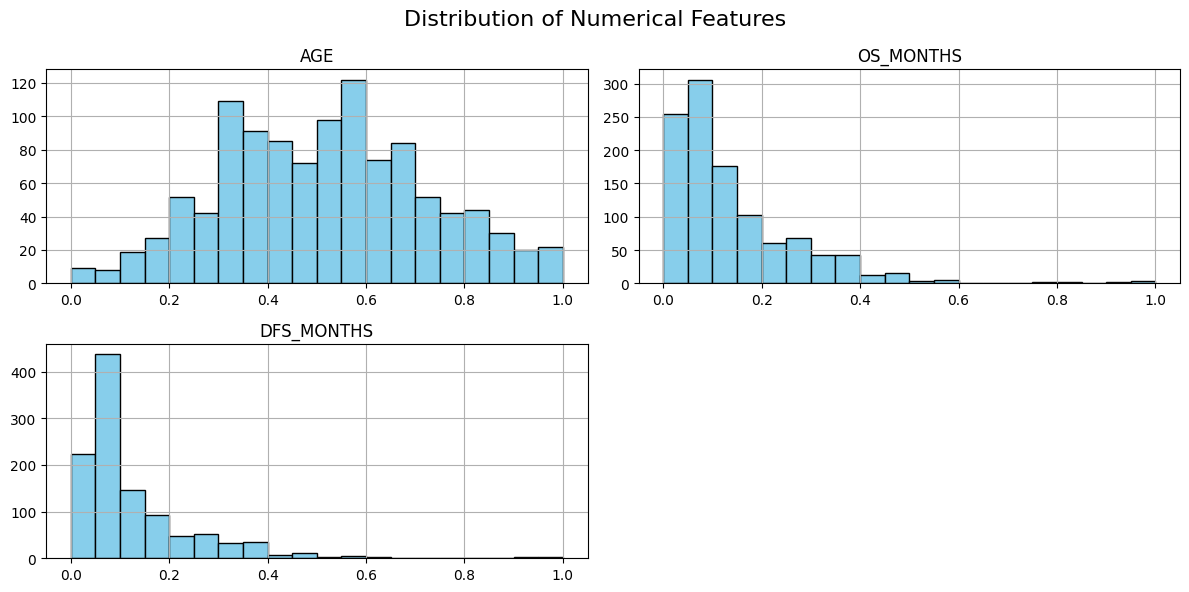

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
numerical_cols = ["AGE", "OS_MONTHS", "DFS_MONTHS"]
df[numerical_cols].hist(bins=20, figsize=(12, 6), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

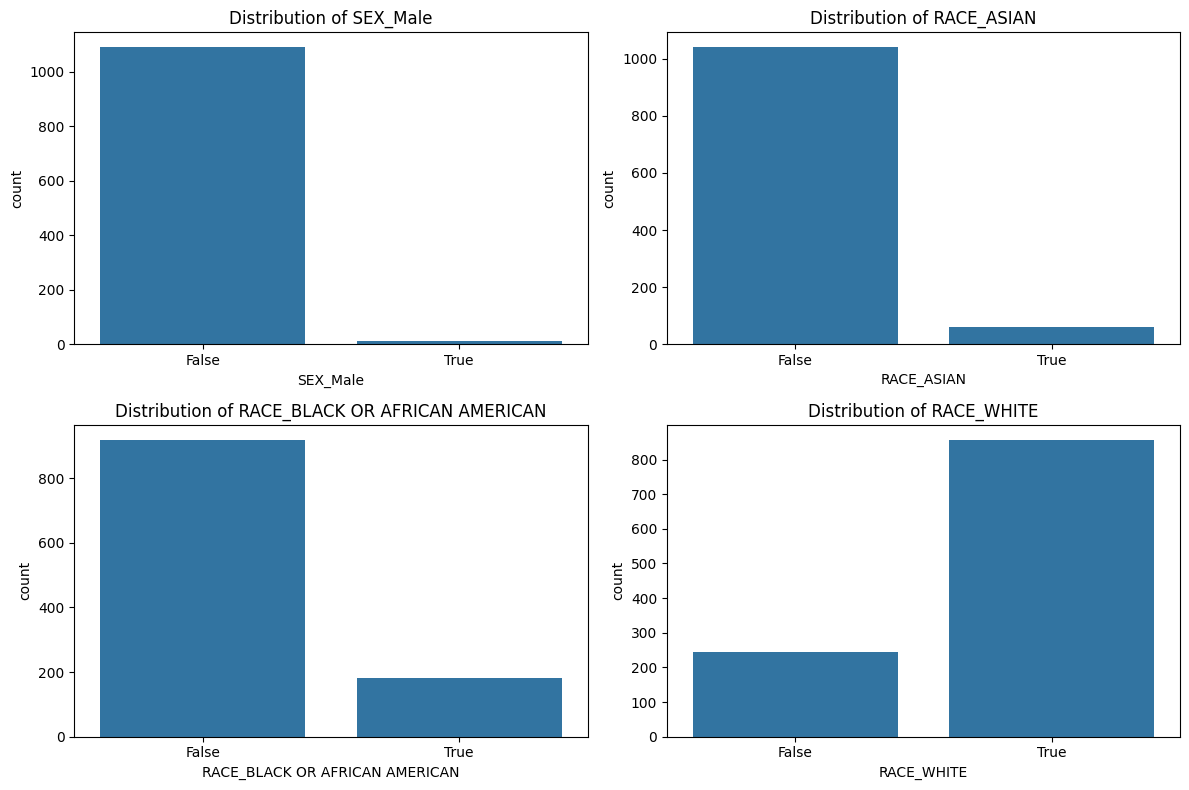

In [21]:
# Plot bar charts for categorical columns
categorical_cols = ["SEX_Male", "RACE_ASIAN", "RACE_BLACK OR AFRICAN AMERICAN", "RACE_WHITE"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for i, col in enumerate(categorical_cols):
    row, col_idx = divmod(i, 2)
    sns.countplot(x=col, data=df, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

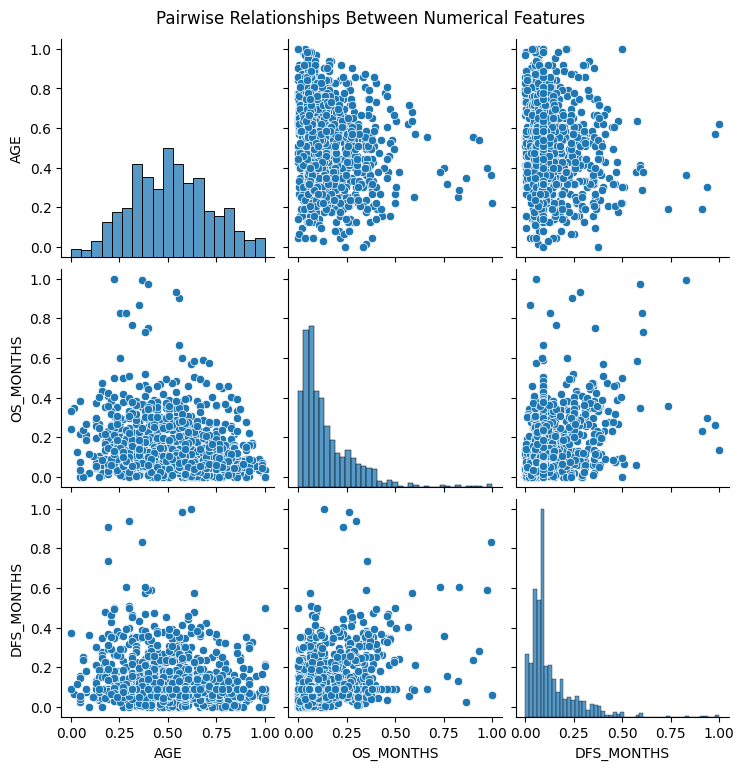

In [22]:
# Pair plot for numerical features
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02)
plt.show()

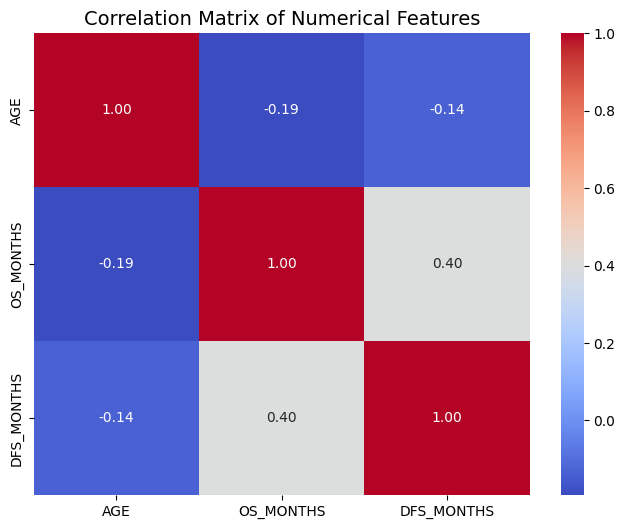

In [23]:
# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.show()

C:\Users\RAMAVATH SANTHOSH\AppData\Local\Temp\ipykernel_7172\283741305.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette="viridis")
C:\Users\RAMAVATH SANTHOSH\AppData\Local\Temp\ipykernel_7172\283741305.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


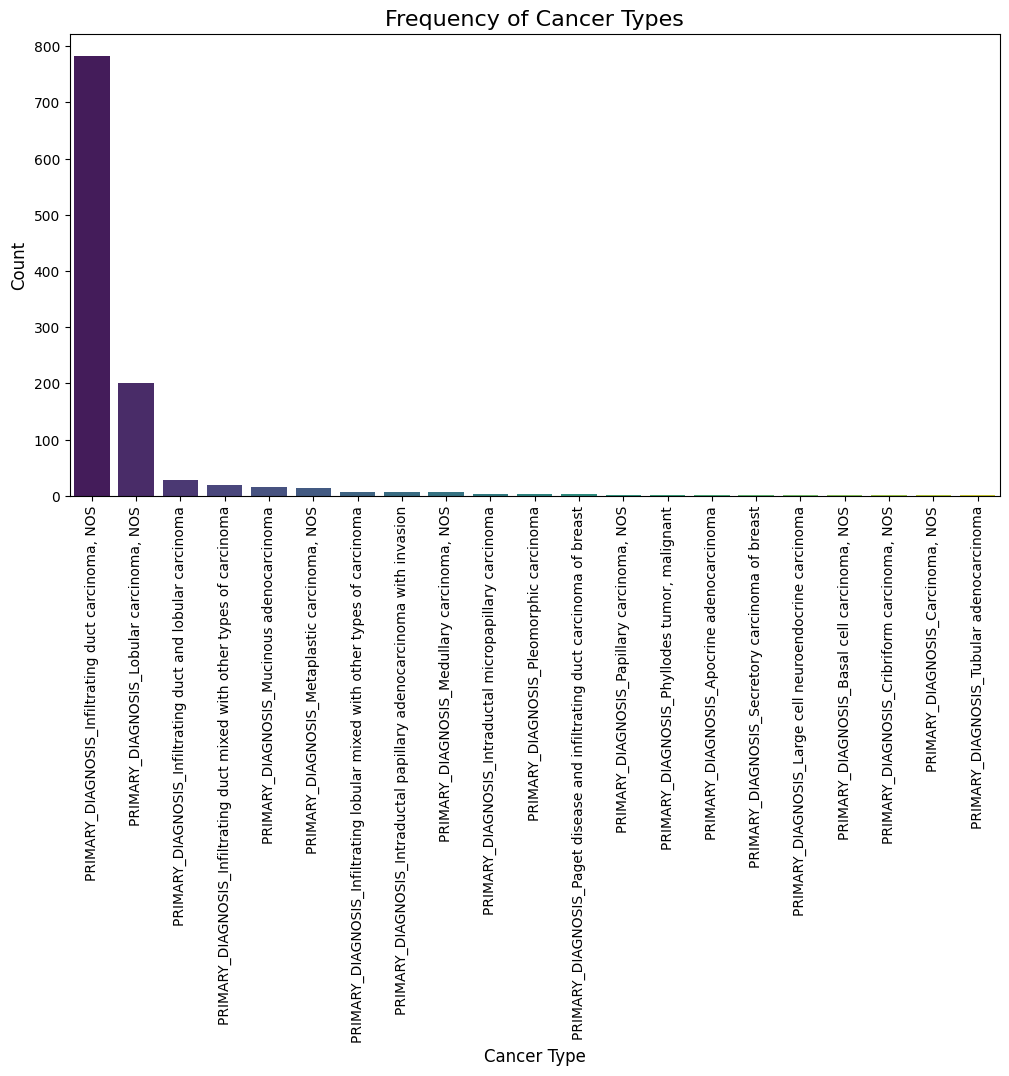

In [24]:
# Sum the one-hot encoded columns to count occurrences of each diagnosis
diagnosis_counts = df[diagnosis_columns].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Frequency of Cancer Types", fontsize=16)
plt.xlabel("Cancer Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

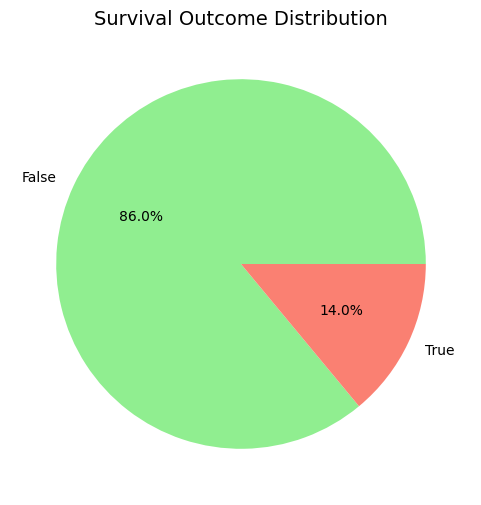

In [25]:
# Count the occurrences of each survival outcome
survival_counts = df["OS_STATUS_1:DECEASED"].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=survival_counts.index, autopct="%1.1f%%", colors=["lightgreen", "salmon"])
plt.title("Survival Outcome Distribution", fontsize=14)
plt.show()

In [29]:
# Convert y_train to a NumPy array and compute argmax
mutual_info = mutual_info_classif(X_train, y_train.values.argmax(axis=1))

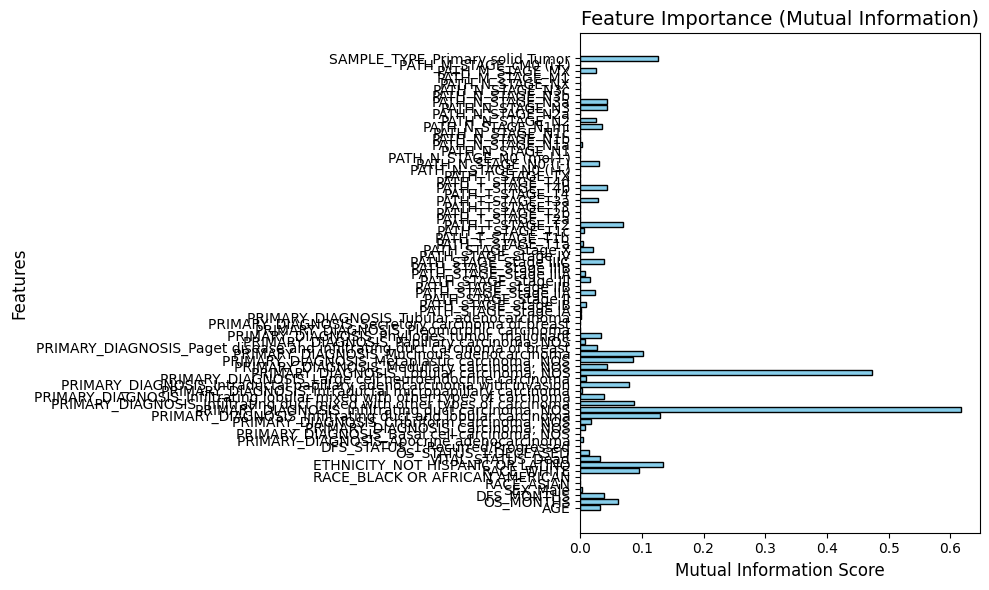

In [30]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Compute mutual information for classification
mutual_info = mutual_info_classif(X_train, y_train.values.argmax(axis=1))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, mutual_info, color="skyblue", edgecolor="black")
plt.title("Feature Importance (Mutual Information)", fontsize=14)
plt.xlabel("Mutual Information Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

In [31]:
# Train the model and store the result in `history`
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,           # Number of training epochs
    batch_size=32,       # Batch size for training
    verbose=1            # Display progress during training
)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9998 - loss: 0.0024 - val_accuracy: 0.9955 - val_loss: 0.0679
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9955 - val_loss: 0.0724
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9973 - loss: 0.0018 - val_accuracy: 0.9910 - val_loss: 0.0714
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9993 - loss: 0.0018 - val_accuracy: 0.9864 - val_loss: 0.0711
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9977 - loss: 0.0011 - val_accuracy: 0.9864 - val_loss: 0.0797
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9996 - loss: 8.3217e-04 - val_accuracy: 0.9864 - val_loss: 0.0796
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9988 - loss: 0.0017 - val_accuracy: 0.9910 - val_loss: 0.0733
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9996 - loss: 0.0011 - val_accuracy: 0.9910 - val

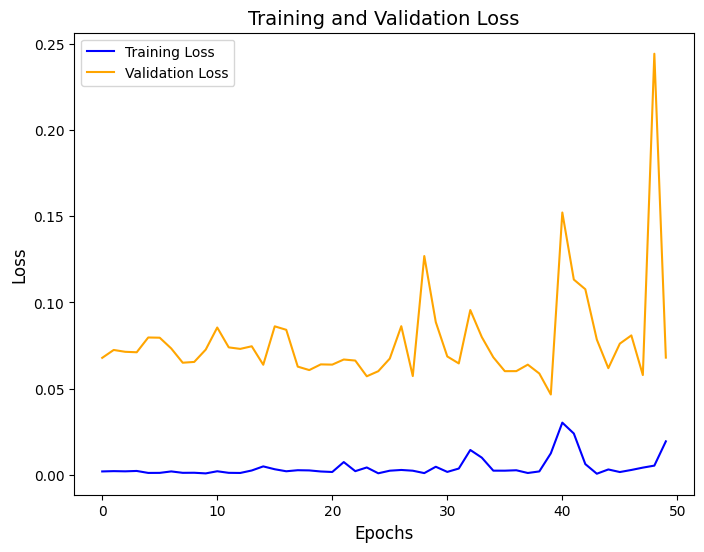

In [32]:
# Assume `history` is the output from model.fit()
plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
plt.title("Training and Validation Loss", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.show()

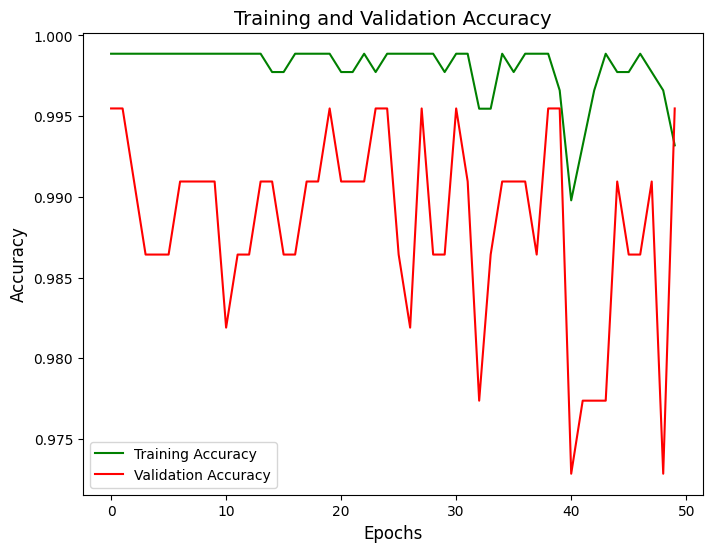

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy", color="green")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="red")
plt.title("Training and Validation Accuracy", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = model.predict(X_test).argmax(axis=1)

# Convert y_test to a NumPy array and apply argmax
y_true = y_test.values.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   5   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 159   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   5   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  38   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [36]:
print(y_test.shape)  # Should be (n_samples, n_classes) for one-hot encoding

(221, 21)


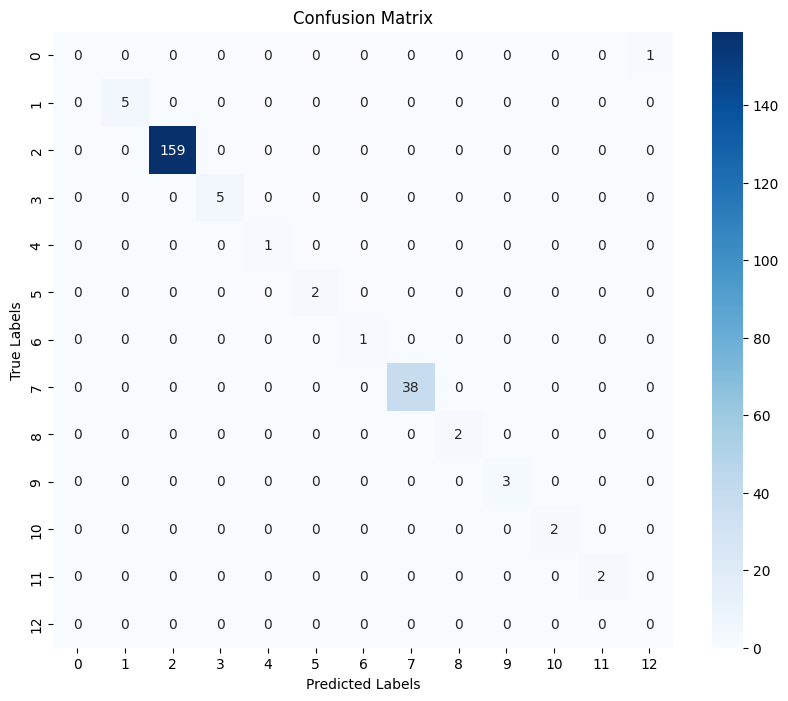

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Integrate Genomic data

###  Load Clinical Data

In [44]:
import pandas as pd

# Load preprocessed clinical data
clinical_data_path = "preprocessed_clinical_data.csv"
clinical_df = pd.read_csv(clinical_data_path, sep="\t")

### Load Genomic Data

In [48]:
# Inspect the File
with open("data_mutations.txt", "r") as f:
    for i, line in enumerate(f):
        print(line.strip())
        if i >= 5:  # Print only the first 5 lines
            break

#genome_nexus_version: 1.0.2
#isoform: mskcc
Hugo_Symbol	Entrez_Gene_Id	Center	NCBI_Build	Chromosome	Start_Position	End_Position	Strand	Consequence	Variant_Classification	Variant_Type	Reference_Allele	Tumor_Seq_Allele1	Tumor_Seq_Allele2	dbSNP_RS	dbSNP_Val_Status	Tumor_Sample_Barcode	Matched_Norm_Sample_Barcode	Match_Norm_Seq_Allele1	Match_Norm_Seq_Allele2	Tumor_Validation_Allele1	Tumor_Validation_Allele2	Match_Norm_Validation_Allele1	Match_Norm_Validation_Allele2	Verification_Status	Validation_Status	Mutation_Status	Sequencing_Phase	Sequence_Source	Validation_Method	Score	BAM_File	Sequencer	t_ref_count	t_alt_count	n_ref_count	n_alt_count	HGVSc	HGVSp	HGVSp_Short	Transcript_ID	RefSeq	Protein_position	Codons	Exon_Number	genomic_location_explanation	Annotation_Status
KDM1A	23028	WUGSC	GRCh38	1	23083363	23083363	+	stop_retained_variant	Silent	SNP	G	G	A			TCGA-3C-AAAU-01A	TCGA-3C-AAAU-10A									Somatic							22	3			ENST00000356634.7:c.2558G>A	p.Ter853=	p.*853=	ENST00000356634	NM_015013.4	8

In [58]:
with open("data_mutations.txt", "r") as f:
    for i, line in enumerate(f):
        print(line.strip())
        if i >= 5:  # Print only the first 5 lines
            break

#genome_nexus_version: 1.0.2
#isoform: mskcc
Hugo_Symbol	Entrez_Gene_Id	Center	NCBI_Build	Chromosome	Start_Position	End_Position	Strand	Consequence	Variant_Classification	Variant_Type	Reference_Allele	Tumor_Seq_Allele1	Tumor_Seq_Allele2	dbSNP_RS	dbSNP_Val_Status	Tumor_Sample_Barcode	Matched_Norm_Sample_Barcode	Match_Norm_Seq_Allele1	Match_Norm_Seq_Allele2	Tumor_Validation_Allele1	Tumor_Validation_Allele2	Match_Norm_Validation_Allele1	Match_Norm_Validation_Allele2	Verification_Status	Validation_Status	Mutation_Status	Sequencing_Phase	Sequence_Source	Validation_Method	Score	BAM_File	Sequencer	t_ref_count	t_alt_count	n_ref_count	n_alt_count	HGVSc	HGVSp	HGVSp_Short	Transcript_ID	RefSeq	Protein_position	Codons	Exon_Number	genomic_location_explanation	Annotation_Status
KDM1A	23028	WUGSC	GRCh38	1	23083363	23083363	+	stop_retained_variant	Silent	SNP	G	G	A			TCGA-3C-AAAU-01A	TCGA-3C-AAAU-10A									Somatic							22	3			ENST00000356634.7:c.2558G>A	p.Ter853=	p.*853=	ENST00000356634	NM_015013.4	8

In [63]:
import pandas as pd

# Path to the mutation data file
mutation_data_path = "data_mutations.txt"

# Attempt to load the file with inferred delimiter and skipping bad lines
try:
    mutation_df = pd.read_csv(mutation_data_path, sep=None, engine="python", on_bad_lines="skip")
except Exception as e:
    print(f"Error loading file: {e}")
    mutation_df = None

# Inspect the loaded data
if mutation_df is not None:
    print(mutation_df.head())
    print("Shape of the dataset:", mutation_df.shape)
else:
    print("Failed to load the dataset.")

                              #genome_nexus_version:  1.0.2
0                                          #isoform:  mskcc
1  Hugo_Symbol\tEntrez_Gene_Id\tCenter\tNCBI_Buil...   None
2  KDM1A\t23028\tWUGSC\tGRCh38\t1\t23083363\t2308...   None
3  DDAH1\t23576\tWUGSC\tGRCh38\t1\t85324885\t8532...   None
4  GATA3\t2625\tWUGSC\tGRCh38\t10\t8073911\t80739...   None
Shape of the dataset: (89014, 2)


In [77]:
import pandas as pd

# Load the file with flexible parsing
mutation_data_path = "data_mutations.txt"
try:
    mutation_df = pd.read_csv(
        mutation_data_path,
        sep="\t",          # Assuming tab-delimited
        comment="#",       # Ignore lines starting with "#"
        on_bad_lines="skip"  # Skip problematic rows
    )
except Exception as e:
    print(f"Error loading file: {e}")

In [78]:
# Display the first few rows
print(mutation_df.head())

# Check for missing values
print(mutation_df.isnull().sum())

# Check column names
print(mutation_df.columns)

  Hugo_Symbol  Entrez_Gene_Id Center NCBI_Build Chromosome  Start_Position  \
0       KDM1A           23028  WUGSC     GRCh38          1        23083363   
1       DDAH1           23576  WUGSC     GRCh38          1        85324885   
2       GATA3            2625  WUGSC     GRCh38         10         8073911   
3      MALAT1          378938  WUGSC     GRCh38         11        65505435   
4      MIPOL1          145282  WUGSC     GRCh38         14        37369580   

   End_Position Strand                         Consequence  \
0      23083363      +               stop_retained_variant   
1      85324885      +             splice_acceptor_variant   
2       8073912      +                  frameshift_variant   
3      65505437      +  non_coding_transcript_exon_variant   
4      37369580      +                    missense_variant   

  Variant_Classification  ...                              HGVSc  \
0                 Silent  ...        ENST00000356634.7:c.2558G>A   
1            Splice_Si

In [81]:
import pandas as pd

# Load the file with low_memory=False
mutation_data_path = "data_mutations.txt"
try:
    mutation_df = pd.read_csv(
        mutation_data_path,
        sep="\t",          # Assuming tab-delimited
        comment="#",       # Ignore lines starting with "#"
        on_bad_lines="skip",  # Skip problematic rows
        low_memory=False   # Prevent mixed-type warnings
    )
except Exception as e:
    print(f"Error loading file: {e}")

In [82]:
import pandas as pd

# Define data types for columns with mixed types
dtype_spec = {
    1: str,   # Column 1 (index starts at 0)
    5: str,   # Column 5
    6: str,   # Column 6
    # Add other columns with mixed types here
}

# Load the file with specified data types
mutation_data_path = "data_mutations.txt"
try:
    mutation_df = pd.read_csv(
        mutation_data_path,
        sep="\t",
        comment="#",
        on_bad_lines="skip",
        dtype=dtype_spec
    )
except Exception as e:
    print(f"Error loading file: {e}")

In [83]:
print(mutation_df.dtypes)

Hugo_Symbol                       object
Entrez_Gene_Id                    object
Center                            object
NCBI_Build                        object
Chromosome                        object
Start_Position                    object
End_Position                      object
Strand                            object
Consequence                       object
Variant_Classification            object
Variant_Type                      object
Reference_Allele                  object
Tumor_Seq_Allele1                 object
Tumor_Seq_Allele2                 object
dbSNP_RS                          object
dbSNP_Val_Status                 float64
Tumor_Sample_Barcode              object
Matched_Norm_Sample_Barcode       object
Match_Norm_Seq_Allele1           float64
Match_Norm_Seq_Allele2           float64
Tumor_Validation_Allele1         float64
Tumor_Validation_Allele2         float64
Match_Norm_Validation_Allele1    float64
Match_Norm_Validation_Allele2    float64
Verification_Sta

In [84]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

# Load the file
mutation_df = pd.read_csv(
    mutation_data_path,
    sep="\t",
    comment="#",
    on_bad_lines="skip"
)

In [85]:
print(mutation_df.head())
print(mutation_df.info())

  Hugo_Symbol  Entrez_Gene_Id Center NCBI_Build Chromosome  Start_Position  \
0       KDM1A           23028  WUGSC     GRCh38          1        23083363   
1       DDAH1           23576  WUGSC     GRCh38          1        85324885   
2       GATA3            2625  WUGSC     GRCh38         10         8073911   
3      MALAT1          378938  WUGSC     GRCh38         11        65505435   
4      MIPOL1          145282  WUGSC     GRCh38         14        37369580   

   End_Position Strand                         Consequence  \
0      23083363      +               stop_retained_variant   
1      85324885      +             splice_acceptor_variant   
2       8073912      +                  frameshift_variant   
3      65505437      +  non_coding_transcript_exon_variant   
4      37369580      +                    missense_variant   

  Variant_Classification  ...                              HGVSc  \
0                 Silent  ...        ENST00000356634.7:c.2558G>A   
1            Splice_Si

In [86]:
filtered_df = mutation_df[mutation_df["Variant_Classification"] == "Missense_Mutation"]

In [87]:
gene_counts = mutation_df["Hugo_Symbol"].value_counts()

In [88]:
# Count mutations per gene
gene_counts = mutation_df["Hugo_Symbol"].value_counts()

# Display top 10 genes
print(gene_counts.head(10))

Hugo_Symbol
PIK3CA    374
TTN       365
TP53      344
MUC16     168
CDH1      134
GATA3     128
MAP3K1    126
RYR2      101
KMT2C     100
SYNE1      91
Name: count, dtype: int64


In [89]:
# Count occurrences of each consequence
consequence_counts = mutation_df["Consequence"].value_counts()

# Display top 10 consequences
print(consequence_counts.head(10))

Consequence
missense_variant                          53635
synonymous_variant                        19332
stop_gained                                4674
frameshift_variant                         4059
missense_variant,splice_region_variant     1565
splice_acceptor_variant                     762
non_coding_transcript_exon_variant          712
intron_variant                              576
inframe_deletion                            573
splice_donor_variant                        549
Name: count, dtype: int64


In [90]:
gene_counts = mutation_df["Hugo_Symbol"].value_counts()
print(gene_counts.head(10))

Hugo_Symbol
PIK3CA    374
TTN       365
TP53      344
MUC16     168
CDH1      134
GATA3     128
MAP3K1    126
RYR2      101
KMT2C     100
SYNE1      91
Name: count, dtype: int64


In [91]:
consequence_counts = mutation_df["Consequence"].value_counts()
print(consequence_counts.head(10))

Consequence
missense_variant                          53635
synonymous_variant                        19332
stop_gained                                4674
frameshift_variant                         4059
missense_variant,splice_region_variant     1565
splice_acceptor_variant                     762
non_coding_transcript_exon_variant          712
intron_variant                              576
inframe_deletion                            573
splice_donor_variant                        549
Name: count, dtype: int64


In [92]:
import pandas as pd

# Load CNA data
cna_data_path = "CNA_Genes.txt"
cna_df = pd.read_csv(cna_data_path, sep="\t", header=None)

# Assign column names based on the structure of the file
cna_df.columns = [
    "Gene", "Chromosome", "Alteration_Type", "Frequency", "Total_Samples", "Percentage", "Driver_Status"
]

# Display the first few rows
print(cna_df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'CNA_Genes.txt'